In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Paso1:** Cargar el dataset

In [2]:
df = pd.read_csv('zoo.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


**Paso2:** Separar los valores de las etiquetas

In [5]:
x=df.iloc[:,1:17].values

In [6]:
y=df['class_type'].values

In [7]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

**Paso 3:** Separar datos para entrenamiento y pruebas

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [10]:
x_train.shape

(70, 16)

In [11]:
x_train

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(x_train)

StandardScaler()

In [15]:
x_train=scaler.transform(x_train)
x_test =scaler.transform(x_test)

**Paso 4:** Entrenar el modelo

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

In [18]:
score

0.9032258064516129

In [19]:
k_range=range(1,20)

In [20]:
list(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [21]:
scores = []

In [22]:
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=1)
    classifier.fit(x_train, y_train)
    scores.append(classifier.score(x_test, y_test)) 

In [23]:
scores

[0.9354838709677419,
 0.9032258064516129,
 0.967741935483871,
 0.967741935483871,
 0.9032258064516129,
 0.9354838709677419,
 0.8709677419354839,
 0.9032258064516129,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.9032258064516129,
 0.8709677419354839,
 0.8709677419354839]

([<matplotlib.axis.XTick at 0x167e04c0040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

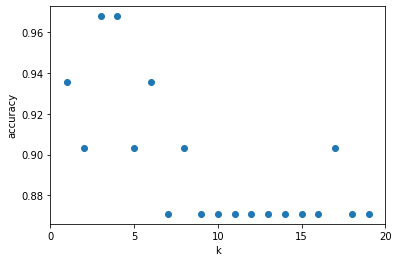

In [24]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

**Paso5:** Usar clasificador optimo 

In [25]:
classifier = KNeighborsClassifier(n_neighbors=2, metric="minkowski", p=1)
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

In [26]:
score

0.9032258064516129

**Paso6:** Calcular Predicciones

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
y_pred

array([1, 2, 7, 1, 4, 2, 1, 1, 5, 2, 2, 6, 4, 1, 6, 1, 2, 3, 3, 2, 2, 1,
       7, 2, 2, 1, 1, 4, 4, 4, 7], dtype=int64)

In [29]:
y_test

array([1, 2, 7, 1, 4, 2, 1, 1, 5, 2, 2, 6, 4, 1, 6, 1, 2, 7, 5, 2, 2, 1,
       7, 3, 2, 1, 1, 4, 4, 4, 7], dtype=int64)

**Paso7:** Generar Reporte

In [30]:
from sklearn.metrics import classification_report

In [31]:
result = classification_report(y_test, y_pred)

In [32]:
print(result)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.90        31
   macro avg       0.84      0.75      0.78        31
weighted avg       0.94      0.90      0.91        31



In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_test, y_pred)

In [35]:
print(accuracy)

0.9032258064516129
